In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

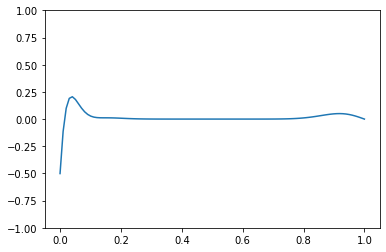

In [8]:
k = 0.2
n = 100
l = 1.
xs = np.linspace(0, l, n, endpoint=True)
Txj = np.zeros(101)

dt = 1e-4
dh = l/n
eps = k*dt/(dh**2)

Tall = np.array([Txj[:n]])

# temperature value
for j in np.linspace(0, 100, 200):
    Tnew = np.zeros(101)
    Tnew[0] = math.sin(10*j/n)
    for i in np.linspace(1, n-1, n-1, dtype=int):
        Tnew[i] = eps*(Txj[i+1] - 2*Txj[i] + Txj[i-1]) + Txj[i]
    Tnew[n-1] = math.exp(-100*(j/n-0.15)**2)
    Txj = Tnew
    Tall = np.vstack([Tall, Tnew[:n]])

def update_linex(num, line):
    line.set_data(xs, Tall[num])
    return line,

fig1 = plt.figure()
ll = plt.plot(xs, Txj[:n])
axes = plt.gca()
axes.set_ylim([-1,1])
line_ani = animation.FuncAnimation(fig1, update_linex, 200, fargs=(ll), interval=20, blit=True)
line_ani.save('temp-dist.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()